In [1]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, accuracy_score
from sklearn import cluster
from sklearn import preprocessing
import missingno as msno
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.datasets import make_blobs
# plt.style.use('dark_background')

In [2]:
##set view entire dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

###### Number of records (rows) in the dataset are: 73
###### Number of features (columns) in the dataset are: 23
###### Number missing values in the dataset are: 4

## Load the database:

In [3]:
df =pd.read_csv('C://Users//Arash//Desktop//T2//non-verbal tourist data.csv')

In [4]:
df

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,indiferent,dislikes,4,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,likes,?,2,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,5,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,indiferent,dislikes,3,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,3,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0
5,F,31,canada,yes,likes,likes,likes,likes,likes,likes,likes,dislikes,1,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
6,M,64,canada,yes,indiferent,likes,likes,likes,likes,indiferent,indiferent,dislikes,1,10,2,B,dislikes,dislikes,likes,indiferent,dislikes,dislikes,1
7,M,51,argentina,yes,likes,likes,likes,likes,likes,indiferent,likes,dislikes,1,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
8,F,28,hungary,no,likes,likes,likes,likes,likes,indiferent,indiferent,dislikes,4,3,3,C,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
9,M,78,england,yes,likes,likes,likes,likes,likes,likes,likes,indiferent,1,3,2,A,dislikes,indiferent,likes,dislikes,likes,indiferent,2


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

In [6]:
df.describe()

,age,Tense - relaxed,Hostile - friendly,Type of Client
count,73.000000,73.000000,73.000000,73.000000
mean,47.260274,2.232877,2.232877,2.493151
std,15.115323,1.523160,1.467429,1.226142
min,24.000000,1.000000,1.000000,0.000000
25%,36.000000,1.000000,1.000000,2.000000
50%,47.000000,2.000000,2.000000,2.000000
75%,56.000000,3.000000,3.000000,3.000000
max,81.000000,5.000000,6.000000,5.000000


## checking which columns have  '?' 

sex
F    38
M    35
Name: sex, dtype: int64




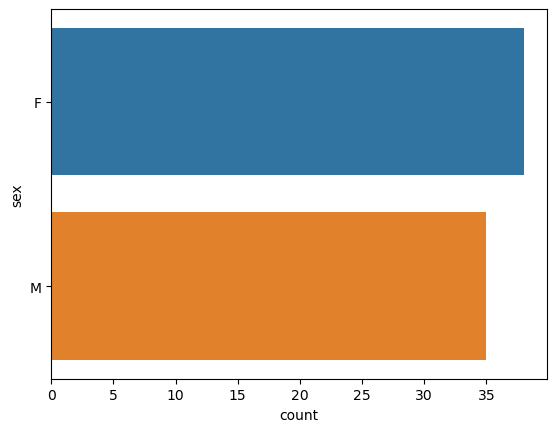



country
england      25
canada       18
germany       4
argentina     3
polish        3
scotland      3
italy         3
russia        3
spain         3
hungary       2
uruguay       1
brasil        1
colombia      1
chile         1
cuba          1
mexico        1
Name: country, dtype: int64




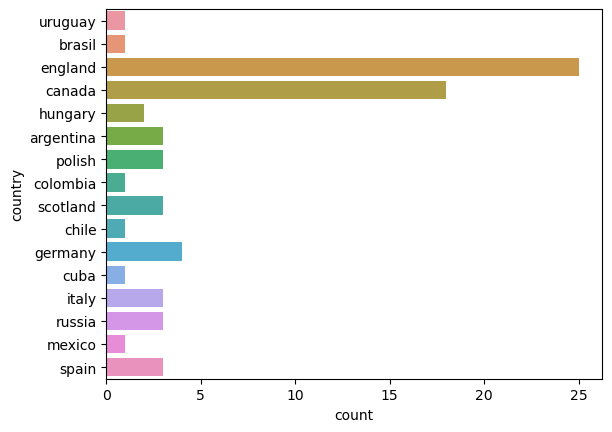



returning
yes    38
no     35
Name: returning, dtype: int64




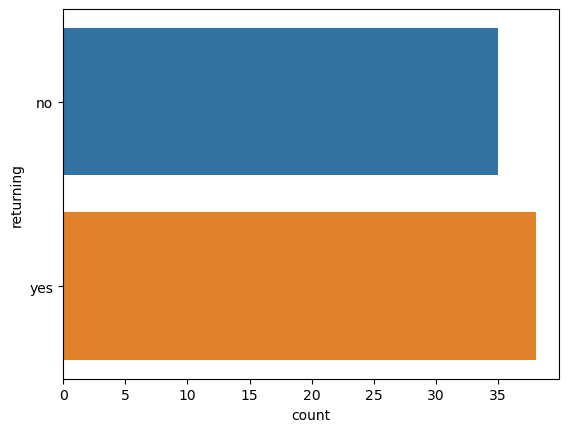



GImg1
likes         50
indiferent    17
dislikes       6
Name: GImg1, dtype: int64




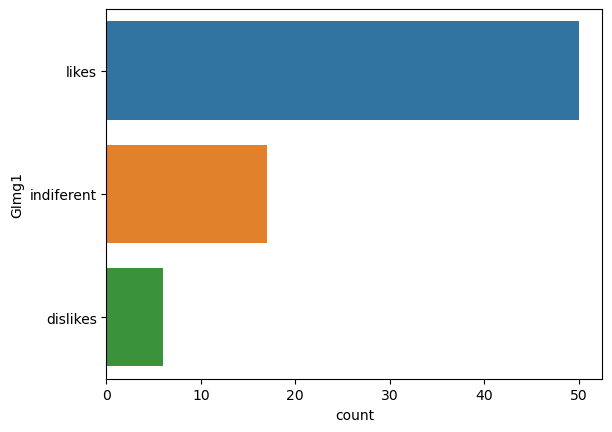



GImg2
likes         39
indiferent    22
dislikes      12
Name: GImg2, dtype: int64




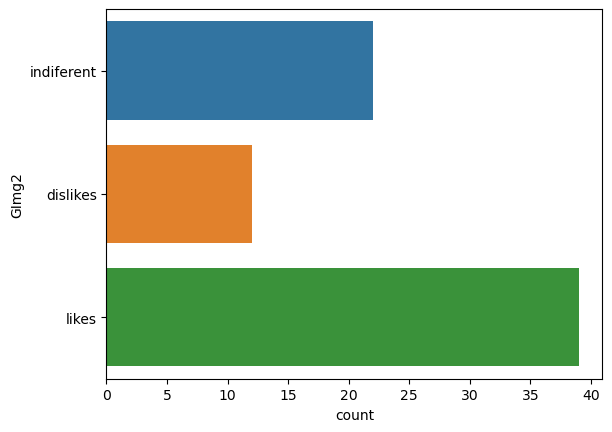



GImg3
likes         41
indiferent    19
dislikes      12
?              1
Name: GImg3, dtype: int64




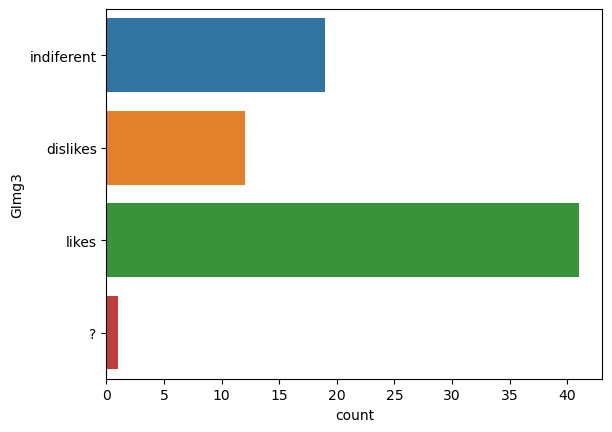



PImg1
likes         70
indiferent     3
Name: PImg1, dtype: int64




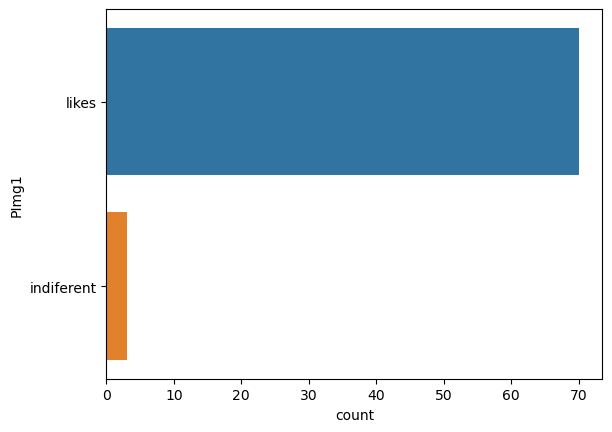



PImg2
likes    73
Name: PImg2, dtype: int64




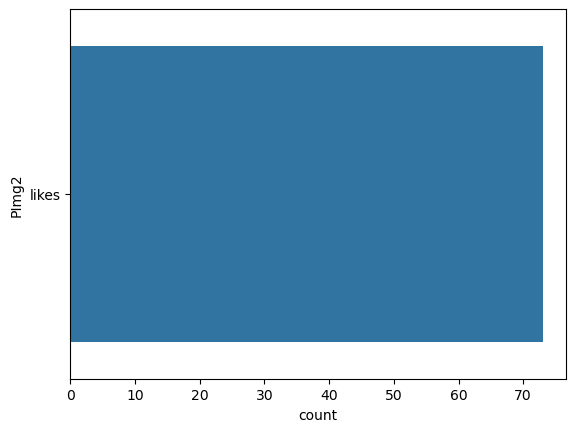



PImg3
likes         45
dislikes      18
indiferent    10
Name: PImg3, dtype: int64




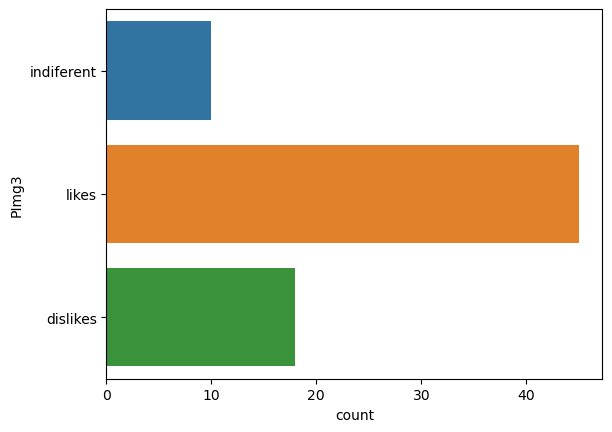



PImg4
likes         41
indiferent    17
dislikes      15
Name: PImg4, dtype: int64




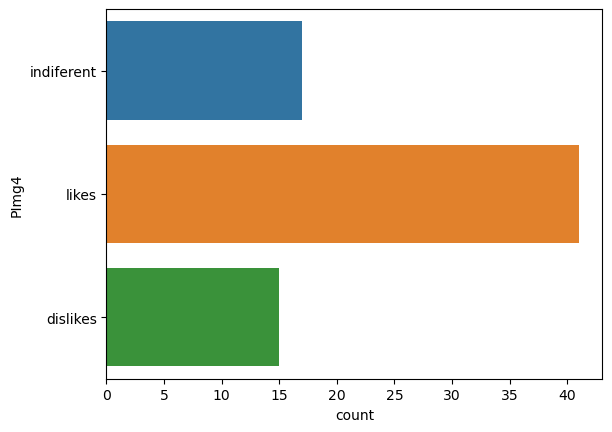



PImg5
dislikes      70
?              2
indiferent     1
Name: PImg5, dtype: int64




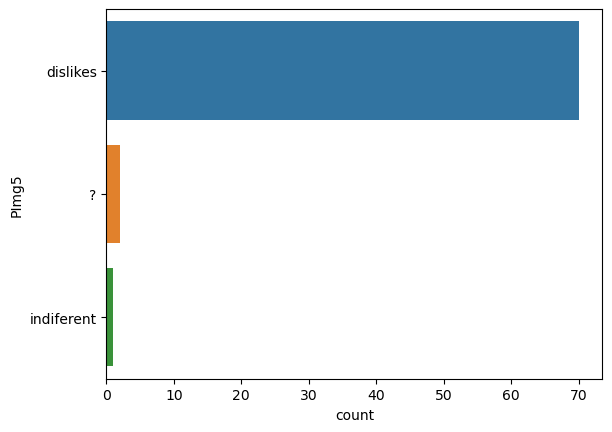



Authoritative -anarchic 
2     13
9      9
4      9
3      8
1      8
10     7
8      5
7      5
6      5
5      3
?      1
Name: Authoritative -anarchic , dtype: int64




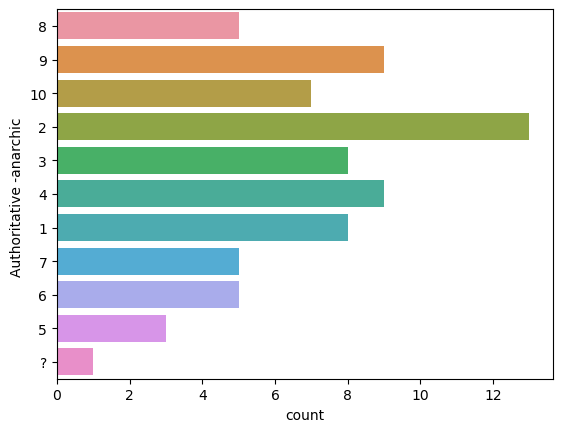



TAudio1
B    28
A    23
C    19
D     3
Name: TAudio1, dtype: int64




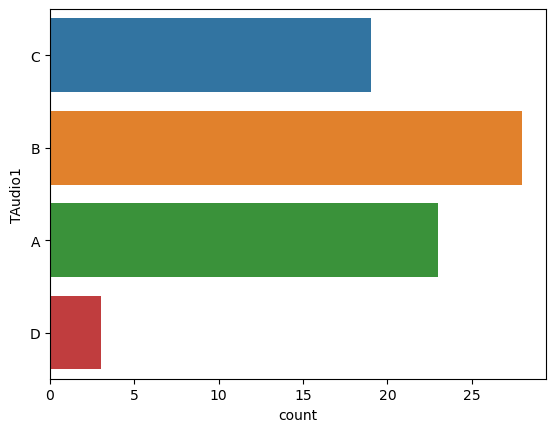



TAudio2
dislikes      59
indiferent    14
Name: TAudio2, dtype: int64




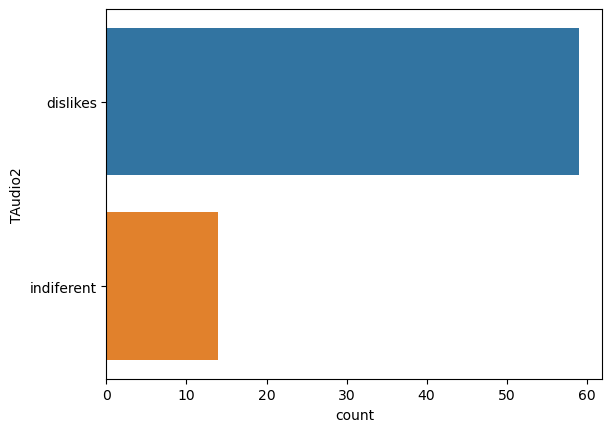



TAudio3
dislikes      56
indiferent    15
likes          2
Name: TAudio3, dtype: int64




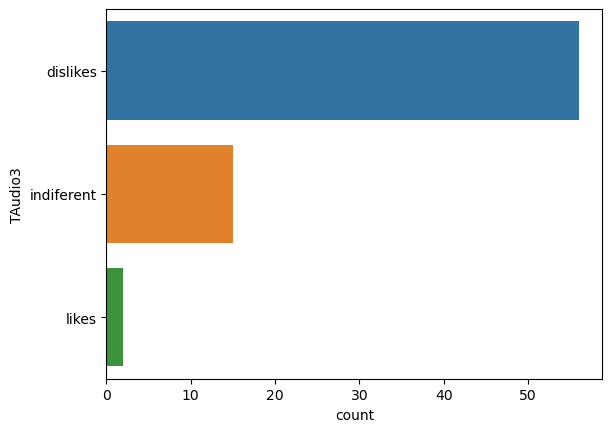



QAudio1
likes         64
indiferent     5
dislikes       4
Name: QAudio1, dtype: int64




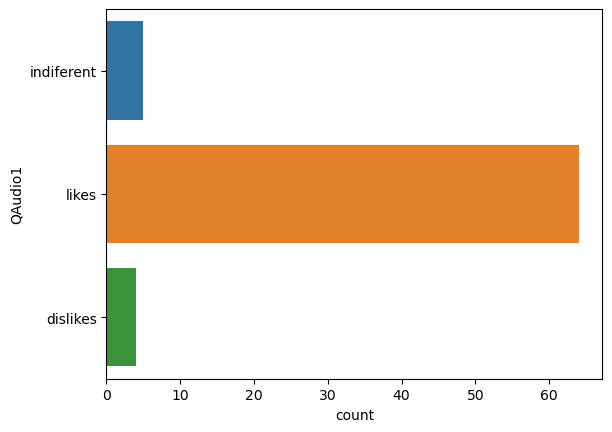



QAudio2
dislikes      62
indiferent    10
likes          1
Name: QAudio2, dtype: int64




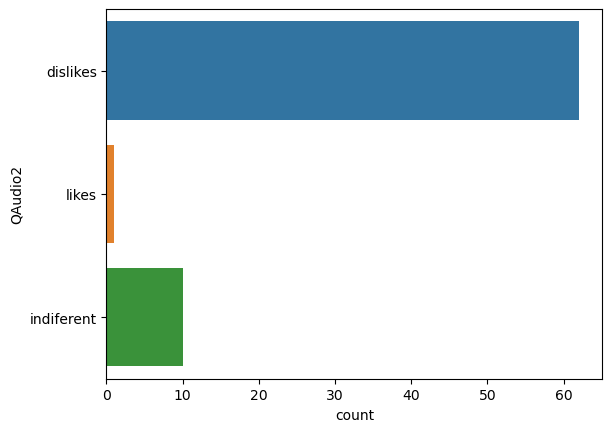



QAudio3
dislikes      60
indiferent    11
likes          2
Name: QAudio3, dtype: int64




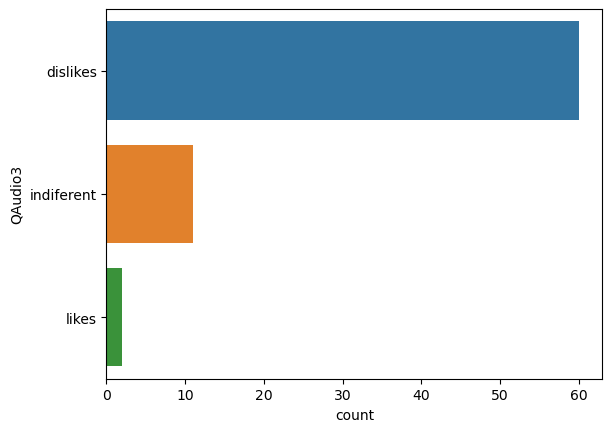



Proxemics
dislikes      63
indiferent     8
likes          2
Name: Proxemics, dtype: int64




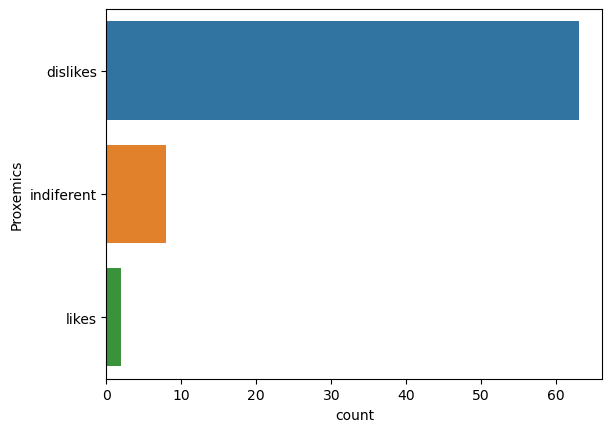

In [137]:
for column in df.select_dtypes(['object']).columns:
    print(column)
    print(df[column].value_counts())
    print('\n')
    sns.countplot(y=df[column])
    plt.show()
    print('\n')

# Data Visualization 


##### Type of client by countries

<AxesSubplot:ylabel='country,Type of Client'>

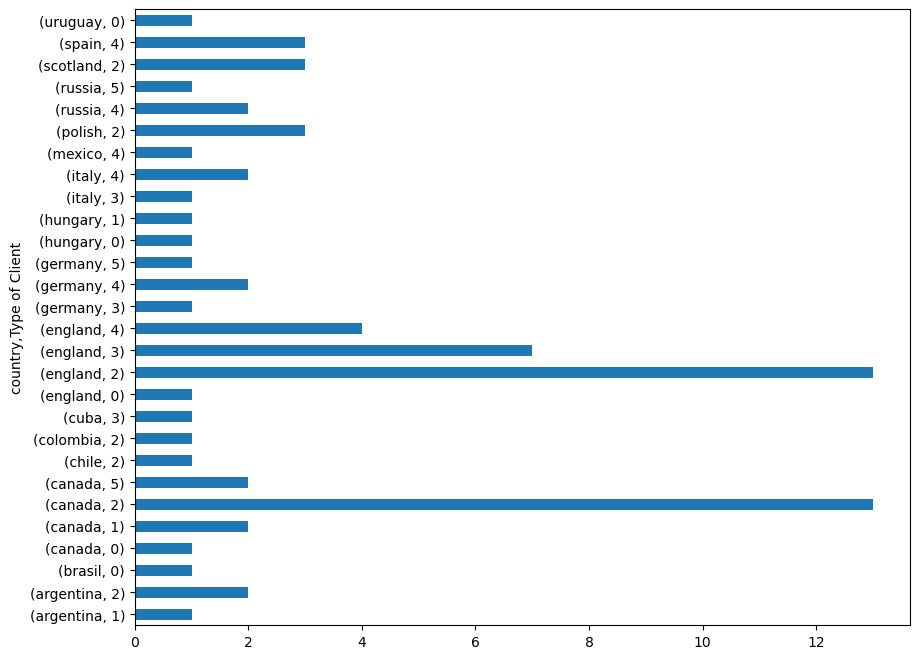

In [138]:
df.groupby(['country','Type of Client'])['country'].count().plot.barh(figsize=(10,8))

In [139]:
question_columns=['GImg3', 'PImg5', 'Authoritative -anarchic ']

In [9]:
for column in question_columns:
    print(column)
    print(df[column].value_counts())
    print('\n')

GImg3
likes         41
indiferent    19
dislikes      12
?              1
Name: GImg3, dtype: int64


PImg5
dislikes      70
?              2
indiferent     1
Name: PImg5, dtype: int64


Authoritative -anarchic 
2     13
9      9
4      9
3      8
1      8
10     7
8      5
7      5
6      5
5      3
?      1
Name: Authoritative -anarchic , dtype: int64




## Data processing

#### Fill Miss values

In [140]:
df_clientes = df.replace('?', 'Unknown')

In [23]:
df_clientes

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,indiferent,dislikes,4,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,likes,Unknown,2,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,5,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,indiferent,dislikes,3,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,3,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0
5,F,31,canada,yes,likes,likes,likes,likes,likes,likes,likes,dislikes,1,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
6,M,64,canada,yes,indiferent,likes,likes,likes,likes,indiferent,indiferent,dislikes,1,10,2,B,dislikes,dislikes,likes,indiferent,dislikes,dislikes,1
7,M,51,argentina,yes,likes,likes,likes,likes,likes,indiferent,likes,dislikes,1,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
8,F,28,hungary,no,likes,likes,likes,likes,likes,indiferent,indiferent,dislikes,4,3,3,C,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
9,M,78,england,yes,likes,likes,likes,likes,likes,likes,likes,indiferent,1,3,2,A,dislikes,indiferent,likes,dislikes,likes,indiferent,2


In [24]:
for column in question_columns:
  print(column)
  print(df_clientes[column].value_counts())
  print('\n')

GImg3
likes         41
indiferent    19
dislikes      12
Unknown        1
Name: GImg3, dtype: int64


PImg5
dislikes      70
Unknown        2
indiferent     1
Name: PImg5, dtype: int64


Authoritative -anarchic 
2          13
9           9
4           9
3           8
1           8
10          7
8           5
7           5
6           5
5           3
Unknown     1
Name: Authoritative -anarchic , dtype: int64




# Data Clening

In [172]:
df_clientes2=df.copy()

###### sex

In [173]:
df_clientes2['sex'].unique()

array(['F', 'M'], dtype=object)

In [174]:
le = preprocessing.LabelEncoder()

In [175]:
le.fit(df_clientes2['sex'])

LabelEncoder()

In [176]:
df_clientes2['sex'] = le.transform(df_clientes2['sex'])

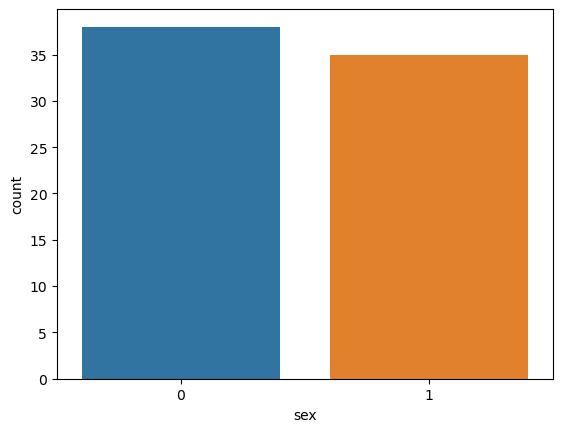

In [177]:
sns.countplot(x=df_clientes2['sex'])
plt.show()

###### Age

In [178]:
df_clientes2['age'].unique()

array([42, 60, 25, 43, 30, 31, 64, 51, 28, 78, 36, 33, 37, 56, 53, 55, 67,
       24, 58, 34, 61, 48, 49, 39, 63, 65, 45, 76, 66, 71, 80, 46, 40, 81,
       77, 38, 41, 26, 29, 47, 27], dtype=int64)

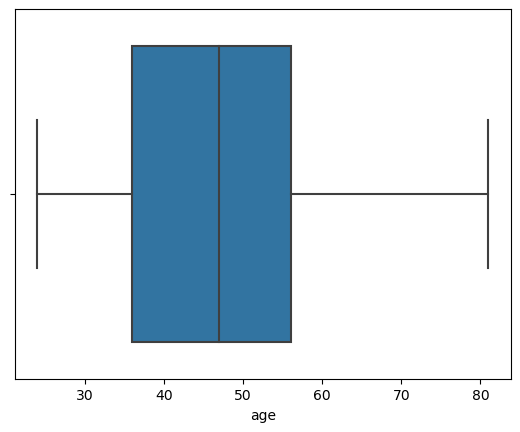

In [179]:
sns.boxplot(x=df_clientes2['age'])
plt.show()

###### Country

In [180]:
df_clientes2['country'].unique()

array(['uruguay', 'brasil', 'england', 'canada', 'hungary', 'argentina',
       'polish', 'colombia', 'scotland', 'chile', 'germany', 'cuba',
       'italy', 'russia', 'mexico', 'spain'], dtype=object)

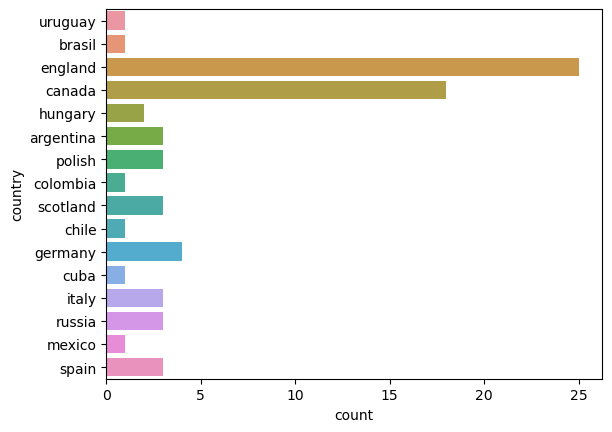

In [181]:
sns.countplot(y=df_clientes2['country'])
plt.show()

In [182]:
df_clientes2 = pd.get_dummies(df_clientes2, columns=['country'])

In [183]:
df_clientes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     int32 
 1   age                       73 non-null     int64 
 2   returning                 73 non-null     object
 3   GImg1                     73 non-null     object
 4   GImg2                     73 non-null     object
 5   GImg3                     73 non-null     object
 6   PImg1                     73 non-null     object
 7   PImg2                     73 non-null     object
 8   PImg3                     73 non-null     object
 9   PImg4                     73 non-null     object
 10  PImg5                     73 non-null     object
 11  Tense - relaxed           73 non-null     int64 
 12  Authoritative -anarchic   73 non-null     object
 13  Hostile - friendly        73 non-null     int64 
 14  TAudio1                   73

###### Returning

In [184]:
df_clientes2['returning'].unique()

array(['no', 'yes'], dtype=object)

In [185]:
le = preprocessing.LabelEncoder()

In [186]:
le.fit(df_clientes2['returning'])

LabelEncoder()

In [187]:
df_clientes2['returning'] = le.transform(df_clientes2['returning'])

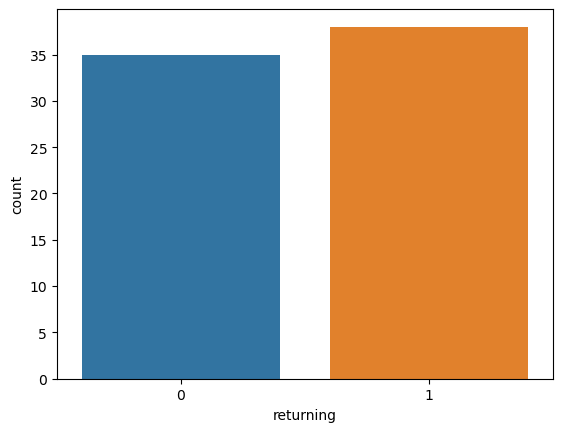

In [188]:
sns.countplot(x=df_clientes2['returning'])
plt.show()

##### Non Verbal Postures (Nominal values)

###### The Proxemics and TAudio1 features had their values swapped. We can adjust this.

In [189]:
df_clientes2[['TAudio1','Proxemics']].head()

,TAudio1,Proxemics
0,C,dislikes
1,B,dislikes
2,C,dislikes
3,C,dislikes
4,C,dislikes


In [190]:
df_clientes2[['TAudio1','Proxemics']] = df_clientes2[['Proxemics','TAudio1']]

In [191]:
df_clientes2[['TAudio1','Proxemics']].head()

,TAudio1,Proxemics
0,dislikes,C
1,dislikes,B
2,dislikes,C
3,dislikes,C
4,dislikes,C


In [192]:
nominal_features = ['GImg1', 'GImg2', 'GImg3',
                    'PImg1', 'PImg2', 'PImg3', 'PImg4', 'PImg5',
                    'TAudio1', 'TAudio2', 'TAudio3',
                    'QAudio1', 'QAudio2', 'QAudio3']

In [193]:
df_clientes2[nominal_features]

,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3
0,likes,indiferent,indiferent,likes,likes,indiferent,indiferent,dislikes,dislikes,dislikes,dislikes,indiferent,dislikes,dislikes
1,likes,indiferent,indiferent,likes,likes,likes,likes,?,dislikes,dislikes,dislikes,likes,likes,dislikes
2,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,dislikes,dislikes,dislikes,likes,dislikes,dislikes
3,likes,dislikes,dislikes,likes,likes,indiferent,indiferent,dislikes,dislikes,dislikes,dislikes,likes,dislikes,indiferent
4,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,dislikes,dislikes,dislikes,likes,indiferent,dislikes
5,likes,likes,likes,likes,likes,likes,likes,dislikes,dislikes,indiferent,dislikes,likes,indiferent,dislikes
6,indiferent,likes,likes,likes,likes,indiferent,indiferent,dislikes,dislikes,dislikes,dislikes,likes,indiferent,dislikes
7,likes,likes,likes,likes,likes,indiferent,likes,dislikes,dislikes,indiferent,dislikes,likes,indiferent,dislikes
8,likes,likes,likes,likes,likes,indiferent,indiferent,dislikes,dislikes,indiferent,dislikes,likes,indiferent,dislikes
9,likes,likes,likes,likes,likes,likes,likes,indiferent,indiferent,dislikes,indiferent,likes,dislikes,likes


In [194]:
pd.crosstab(**df_clientes2[nominal_features].melt(var_name='columns', value_name='index'))

columns,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,QAudio1,QAudio2,QAudio3,TAudio1,TAudio2,TAudio3
index,,,,,,,,,,,,,,
?,0,0,1,0,0,0,0,2,0,0,0,0,0,0
dislikes,6,12,12,0,0,18,15,70,4,62,60,63,59,56
indiferent,17,22,19,3,0,10,17,1,5,10,11,8,14,15
likes,50,39,41,70,73,45,41,0,64,1,2,2,0,2


In [195]:
# drop the rows with the '?' character
df_clientes2.drop(df_clientes2[df_clientes2['GImg3'] == '?'].index, inplace=True)
df_clientes2.drop(df_clientes2[df_clientes2['PImg5'] == '?'].index, inplace=True)

In [196]:
value_counts = pd.crosstab(**df_clientes2[nominal_features].melt(var_name='columns', value_name='index'))
value_counts

columns,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,QAudio1,QAudio2,QAudio3,TAudio1,TAudio2,TAudio3
index,,,,,,,,,,,,,,
dislikes,5,11,12,0,0,17,14,69,4,60,57,60,56,53
indiferent,17,21,17,3,0,10,17,1,4,10,11,8,14,15
likes,48,38,41,67,70,43,39,0,62,0,2,2,0,2


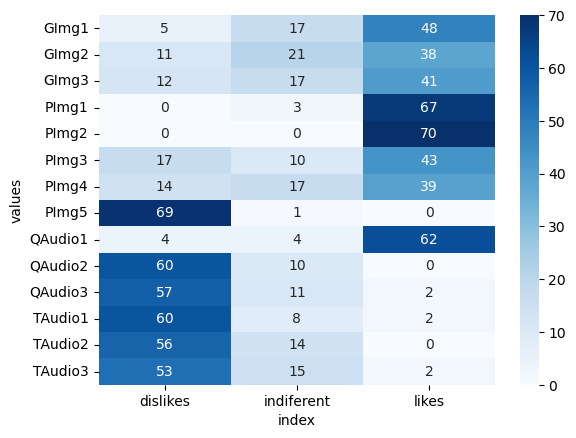

In [197]:
ax = sns.heatmap(value_counts.transpose(), annot=True, cmap='Blues')
ax.set(ylabel='values')
plt.show()

In [198]:
df_clientes3=df_clientes2.copy()

In [199]:
df_clientes3 = pd.get_dummies(df_clientes3, columns=nominal_features)

In [201]:
df_clientes3 = pd.get_dummies(df_clientes3, columns=["returning"])

In [202]:
df_clientes3.shape

(70, 61)

In [203]:
df_clientes3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 72
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       70 non-null     int32 
 1   age                       70 non-null     int64 
 2   Tense - relaxed           70 non-null     int64 
 3   Authoritative -anarchic   70 non-null     object
 4   Hostile - friendly        70 non-null     int64 
 5   Proxemics                 70 non-null     object
 6   Type of Client            70 non-null     int64 
 7   country_argentina         70 non-null     uint8 
 8   country_brasil            70 non-null     uint8 
 9   country_canada            70 non-null     uint8 
 10  country_chile             70 non-null     uint8 
 11  country_colombia          70 non-null     uint8 
 12  country_cuba              70 non-null     uint8 
 13  country_england           70 non-null     uint8 
 14  country_germany           70

##### Non Verbal Postures (Ordinal values)

In [204]:
df_clientes3[['Tense - relaxed', 'Authoritative -anarchic ', 'Hostile - friendly', 'Proxemics']].head()

,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,Proxemics
0,4,8,3,C
2,5,10,5,C
3,3,2,1,C
4,3,9,3,C
5,1,9,1,B


###### Proxemics

In [205]:
df_clientes3['Proxemics'].unique()

array(['C', 'B', 'A', 'D'], dtype=object)

In [206]:
le = preprocessing.LabelEncoder()
le.fit(df_clientes3['Proxemics'])
df_clientes3['Proxemics'] = le.transform(df_clientes3['Proxemics'])

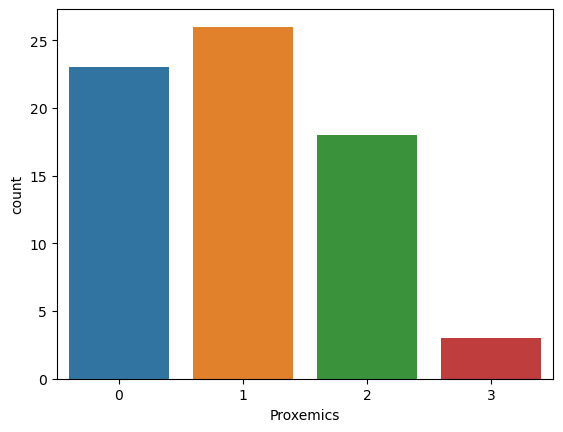

In [207]:
sns.countplot(x=df_clientes3['Proxemics'])
plt.show()

In [208]:
# one of them has object type (Authoritative -anarchic), possibly a '?' character
df_clientes3.drop(df_clientes3[df_clientes3['Authoritative -anarchic '] == '?'].index, inplace=True)

In [209]:
df_clientes3['Authoritative -anarchic '] = df_clientes3['Authoritative -anarchic '].astype(int)

In [210]:
df_clientes3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 72
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   sex                       69 non-null     int32
 1   age                       69 non-null     int64
 2   Tense - relaxed           69 non-null     int64
 3   Authoritative -anarchic   69 non-null     int32
 4   Hostile - friendly        69 non-null     int64
 5   Proxemics                 69 non-null     int32
 6   Type of Client            69 non-null     int64
 7   country_argentina         69 non-null     uint8
 8   country_brasil            69 non-null     uint8
 9   country_canada            69 non-null     uint8
 10  country_chile             69 non-null     uint8
 11  country_colombia          69 non-null     uint8
 12  country_cuba              69 non-null     uint8
 13  country_england           69 non-null     uint8
 14  country_germany           69 non-null     ui

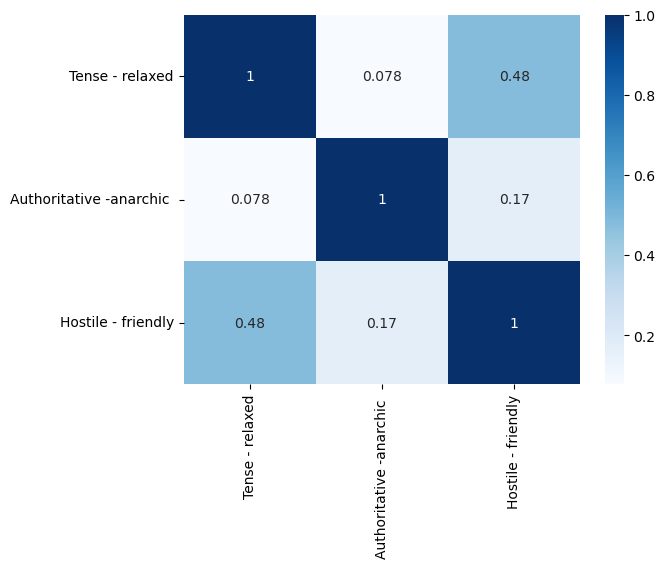

In [211]:
## seems like relaxed and friendly environments are correlated
sns.heatmap(df_clientes3[['Tense - relaxed', 'Authoritative -anarchic ', 'Hostile - friendly']].corr(), annot=True, cmap='Blues')
plt.show()

##### Targe: Type of Client

In [212]:
df_clientes3['Type of Client'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

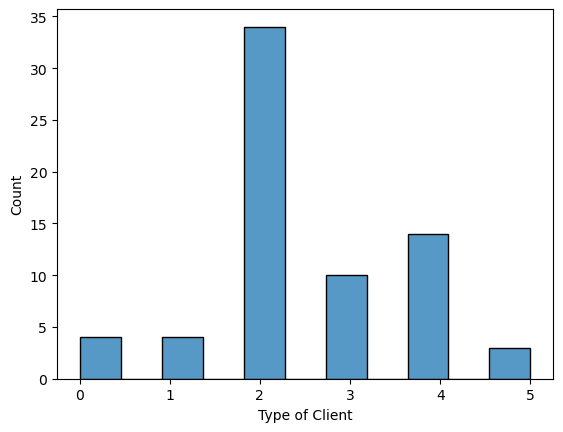

In [213]:
sns.histplot(x=df_clientes3['Type of Client'])
plt.show()

In [214]:
df_clientes3

,sex,age,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,Proxemics,Type of Client,country_argentina,country_brasil,country_canada,country_chile,country_colombia,country_cuba,country_england,country_germany,country_hungary,country_italy,country_mexico,country_polish,country_russia,country_scotland,country_spain,country_uruguay,GImg1_dislikes,GImg1_indiferent,GImg1_likes,GImg2_dislikes,GImg2_indiferent,GImg2_likes,GImg3_dislikes,GImg3_indiferent,GImg3_likes,PImg1_indiferent,PImg1_likes,PImg2_likes,PImg3_dislikes,PImg3_indiferent,PImg3_likes,PImg4_dislikes,PImg4_indiferent,PImg4_likes,PImg5_dislikes,PImg5_indiferent,TAudio1_dislikes,TAudio1_indiferent,TAudio1_likes,TAudio2_dislikes,TAudio2_indiferent,TAudio3_dislikes,TAudio3_indiferent,TAudio3_likes,QAudio1_dislikes,QAudio1_indiferent,QAudio1_likes,QAudio2_dislikes,QAudio2_indiferent,QAudio3_dislikes,QAudio3_indiferent,QAudio3_likes,returning_0,returning_1
0,0,42,4,8,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
2,0,25,5,10,5,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0
3,1,43,3,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0
4,1,30,3,9,3,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0
5,0,31,1,9,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,1
6,1,64,1,10,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1
7,1,51,1,9,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,1
8,0,28,4,3,3,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0
9,1,78,1,3,2,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1
10,0,36,1,4,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1


In [26]:
TOC=df['Type of Client']
temp_TOC=np.array(TOC)
temp_TOC


array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5], dtype=int64)

# Custom Algorithm

In [218]:
dataset2_norm = df_clientes3.copy()
scaler = preprocessing.StandardScaler()
dataset2_norm[['age','Tense - relaxed','Authoritative -anarchic ','Hostile - friendly','Proxemics']] = scaler.fit_transform(dataset2_norm[['age','Tense - relaxed','Authoritative -anarchic ','Hostile - friendly','Proxemics']])
dataset2_norm

,sex,age,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,Proxemics,Type of Client,country_argentina,country_brasil,country_canada,country_chile,country_colombia,country_cuba,country_england,country_germany,country_hungary,country_italy,country_mexico,country_polish,country_russia,country_scotland,country_spain,country_uruguay,GImg1_dislikes,GImg1_indiferent,GImg1_likes,GImg2_dislikes,GImg2_indiferent,GImg2_likes,GImg3_dislikes,GImg3_indiferent,GImg3_likes,PImg1_indiferent,PImg1_likes,PImg2_likes,PImg3_dislikes,PImg3_indiferent,PImg3_likes,PImg4_dislikes,PImg4_indiferent,PImg4_likes,PImg5_dislikes,PImg5_indiferent,TAudio1_dislikes,TAudio1_indiferent,TAudio1_likes,TAudio2_dislikes,TAudio2_indiferent,TAudio3_dislikes,TAudio3_indiferent,TAudio3_likes,QAudio1_dislikes,QAudio1_indiferent,QAudio1_likes,QAudio2_dislikes,QAudio2_indiferent,QAudio3_dislikes,QAudio3_indiferent,QAudio3_likes,returning_0,returning_1
0,0,-0.344672,1.178992,0.954829,0.513169,1.119156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
2,0,-1.455385,1.840378,1.607138,1.875041,1.119156,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0
3,1,-0.279336,0.517606,-1.002098,-0.848703,1.119156,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0
4,1,-1.128705,0.517606,1.280984,0.513169,1.119156,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0
5,0,-1.063369,-0.805165,1.280984,-0.848703,-0.033408,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,1
6,1,1.092723,-0.805165,1.607138,-0.167767,-0.033408,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1
7,1,0.243353,-0.805165,1.280984,-0.848703,-0.033408,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,1
8,0,-1.259377,1.178992,-0.675944,0.513169,1.119156,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0
9,1,2.007428,-0.805165,-0.675944,-0.167767,-1.185972,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1
10,0,-0.736688,-0.805165,-0.349789,-0.848703,-1.185972,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1


In [283]:
dataset2_kmc=dataset2_norm.copy()
dataset2_kmc.drop('Type of Client', axis = 1,inplace=True)

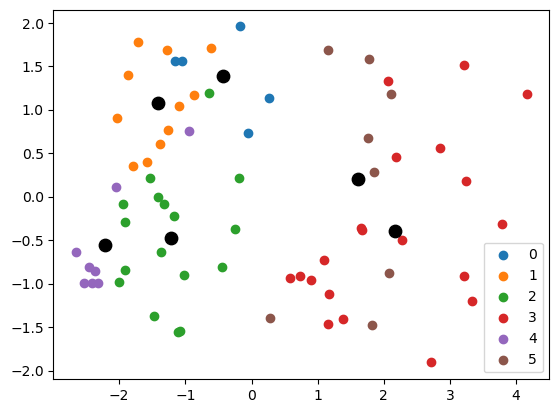

In [358]:

#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points, centroids
 
 
#Load Data

pca = PCA(5)
  
#Transform the data
df3 = pca.fit_transform(dataset2_kmc)
# print(df3.shape)
#Applying our function
label,centr = kmeans(df3,6,1000)
# Visualize the results
 
u_labels = np.unique(label)


for i in u_labels:
    plt.scatter(df3[label == i , 0] , df3[label == i , 1] , label = i)
plt.scatter(centr[:,0] , centr[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

### evaluation

In [360]:
correct_answer = 0
for i in range(0,69):
    if label[i] == temp_TOC[i]:
        correct_answer+=1
print('correct_answer=', correct_answer)
accuracy = (correct_answer/69)*100
print('accuracy= ',accuracy)


accuracy = metrics.accuracy_score(temp_TOC, label)
# print('accuracy= ',accuracy)

ari = metrics.adjusted_rand_score(temp_TOC, label)
print("ari",ari)

# Calculate cluster metrics.homogeneity
purity = metrics.homogeneity_score(temp_TOC, label)
print("purity",purity)




correct_answer= 21
accuracy=  30.434782608695656
ari 0.17650058631846743
purity 0.45667308569739345


#### replace the categorical values ( Male, Female, Indifferent, likes, dislikes) with numerical values

In [25]:
df_clientes.select_dtypes(['object']).columns

Index(['sex', 'country', 'returning', 'GImg1', 'GImg2', 'GImg3', 'PImg1',
       'PImg2', 'PImg3', 'PImg4', 'PImg5', 'Authoritative -anarchic ',
       'TAudio1', 'TAudio2', 'TAudio3', 'QAudio1', 'QAudio2', 'QAudio3',
       'Proxemics'],
      dtype='object')

In [330]:
df_clientes_cat = df_clientes.copy()

In [331]:
for col in list(df_clientes_cat.select_dtypes(['object']).columns):
    df_clientes_cat[col] = df_clientes_cat[col].astype('category').cat.codes

In [332]:
df_clientes_cat.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,0,42,15,0,2,1,2,1,0,1,1,1,4,8,3,2,0,0,1,0,0,0,0
1,1,60,1,0,2,1,2,1,0,2,2,0,2,9,1,1,0,0,2,2,0,0,0
2,0,25,6,0,1,1,2,1,0,1,2,1,5,1,5,2,0,0,2,0,0,0,0
3,1,43,2,0,2,0,1,1,0,1,1,1,3,2,1,2,0,0,2,0,1,0,0
4,1,30,8,0,1,1,2,1,0,1,2,1,3,9,3,2,0,0,2,1,0,0,0


# ALgorithm K-Prototypes

In [111]:
df_kpro=df.copy()
# df_kpro

df_kpro[['TAudio1','Proxemics']] = df_kpro[['Proxemics','TAudio1']]
# drop the rows with the '?' character
df_kpro.drop(df_kpro[df_kpro['Authoritative -anarchic '] == '?'].index, inplace=True)
df_kpro.drop(df_kpro[df_kpro['GImg3'] == '?'].index, inplace=True)
df_kpro.drop(df_kpro[df_kpro['PImg5'] == '?'].index, inplace=True)

TOC=df_kpro['Type of Client']
temp_TOC=np.array(TOC)
temp_TOC

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5], dtype=int64)

In [112]:
df_kpro.drop('Type of Client', axis = 1,inplace=True)

In [113]:
df_kpro['Authoritative -anarchic '] = df_kpro['Authoritative -anarchic '].astype(int)

In [114]:
dataset3_norm = df_kpro.copy()
scaler = preprocessing.StandardScaler()
dataset3_norm[['age','Tense - relaxed','Authoritative -anarchic ','Hostile - friendly']] = scaler.fit_transform(dataset3_norm[['age','Tense - relaxed','Authoritative -anarchic ','Hostile - friendly']])
# dataset3_norm
df_kpro

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,indiferent,dislikes,4,8,3,dislikes,dislikes,dislikes,indiferent,dislikes,dislikes,C
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,5,10,5,dislikes,dislikes,dislikes,likes,dislikes,dislikes,C
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,indiferent,dislikes,3,2,1,dislikes,dislikes,dislikes,likes,dislikes,indiferent,C
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,3,9,3,dislikes,dislikes,dislikes,likes,indiferent,dislikes,C
5,F,31,canada,yes,likes,likes,likes,likes,likes,likes,likes,dislikes,1,9,1,dislikes,indiferent,dislikes,likes,indiferent,dislikes,B
6,M,64,canada,yes,indiferent,likes,likes,likes,likes,indiferent,indiferent,dislikes,1,10,2,dislikes,dislikes,dislikes,likes,indiferent,dislikes,B
7,M,51,argentina,yes,likes,likes,likes,likes,likes,indiferent,likes,dislikes,1,9,1,dislikes,indiferent,dislikes,likes,indiferent,dislikes,B
8,F,28,hungary,no,likes,likes,likes,likes,likes,indiferent,indiferent,dislikes,4,3,3,dislikes,indiferent,dislikes,likes,indiferent,dislikes,C
9,M,78,england,yes,likes,likes,likes,likes,likes,likes,likes,indiferent,1,3,2,indiferent,dislikes,indiferent,likes,dislikes,likes,A
10,F,36,england,yes,likes,likes,likes,likes,likes,likes,likes,dislikes,1,4,1,dislikes,dislikes,indiferent,likes,indiferent,likes,A


In [133]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=6, init='Cao')

In [134]:
clusters = kproto.fit_predict(df_kpro, categorical=[0,2,3,4,5,6,7,8,9,10,11,15,16,17,18,19,20,21])

In [135]:

correct_answer = 0
for i in range(0,69):
    if clusters[i] == temp_TOC[i]:
        correct_answer+=1
print('correct_answer=', correct_answer)
accuracy = (correct_answer/69)*100
print('accuracy= ',accuracy)


accuracy = metrics.accuracy_score(temp_TOC, clusters)
# print('accuracy= ',accuracy)

ari = metrics.adjusted_rand_score(temp_TOC, clusters)
print("ari",ari)

# Calculate cluster metrics.homogeneity
purity = metrics.homogeneity_score(temp_TOC, clusters)
print("purity",purity)


correct_answer= 5
accuracy=  7.246376811594203
ari 0.016418437171609138
purity 0.219968251176513


In [532]:
print(clusters)
frame = pd.DataFrame(dataset3_norm)
frame['cluster2'] = clusters
frame['cluster2'].value_counts()


[1 4 1 1 3 3 3 1 5 0 0 0 2 3 2 3 2 5 4 3 0 3 3 5 3 3 0 3 5 0 3 5 0 0 5 5 5
 5 5 0 0 5 2 1 5 1 1 0 5 5 1 0 4 1 1 1 2 1 1 4 4 4 1 1 1 4 4 0 2]


1    16
5    14
0    13
3    12
4     8
2     6
Name: cluster2, dtype: int64

# ALgorithm K-MEANS in Library

In [281]:
dataset2_km = dataset2_norm.copy()
dataset2_km.drop('Type of Client', axis = 1,inplace=True)
kmeans = KMeans(n_clusters=6).fit(dataset2_km)
kmeans_labels = kmeans.labels_
kmeans_center=kmeans.cluster_centers_
print(kmeans_labels)


[3 3 4 3 1 1 1 4 2 2 2 2 0 1 0 1 0 1 4 1 2 1 1 2 1 1 2 1 1 2 1 2 2 2 2 2 1
 2 2 2 2 2 0 4 2 4 3 4 2 2 4 4 3 3 3 3 0 3 3 5 5 5 3 3 3 5 5 4 4]


In [282]:

correct_answer = 0
for i in range(0,69):
    if kmeans_labels[i] == temp_TOC[i]:
        correct_answer+=1
print('correct_answer=', correct_answer)
accuracy = (correct_answer/69)*100
print('accuracy= ',accuracy)


accuracy = metrics.accuracy_score(temp_TOC, kmeans_labels)
# print('accuracy= ',accuracy)

ari = metrics.adjusted_rand_score(temp_TOC, kmeans_labels)
print("ari",ari)

# Calculate cluster metrics.homogeneity
purity = metrics.homogeneity_score(temp_TOC, kmeans_labels)
print("purity",purity)


correct_answer= 23
accuracy=  33.33333333333333
ari 0.3251108175939536
purity 0.5174817064990811


# Question & Answer

In [339]:
df_corr=df.copy()
df_corr.drop('Type of Client', axis = 1,inplace=True)
df_corr.drop('PImg2', axis = 1,inplace=True)
for col in list(df_corr.select_dtypes(['object']).columns):
    df_corr[col] = df_corr[col].astype('category').cat.codes


In [338]:

corr_c = df_corr.corr()
corr_c.style.background_gradient(cmap='coolwarm').format(precision=2)

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg3,PImg4,PImg5,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics
sex,1.00,0.15,-0.18,0.04,-0.13,-0.14,-0.13,0.06,-0.06,-0.02,0.07,-0.04,0.00,-0.06,-0.03,-0.12,0.05,0.01,0.02,0.11,-0.05
age,0.15,1.00,-0.29,0.32,0.30,0.23,0.27,-0.05,0.33,0.27,0.07,-0.40,-0.09,-0.27,-0.25,-0.16,0.03,0.07,-0.09,0.06,0.18
country,-0.18,-0.29,1.00,-0.12,-0.19,-0.30,-0.25,0.01,-0.29,-0.33,0.16,0.37,-0.08,0.18,0.37,-0.12,-0.01,-0.28,-0.22,-0.03,-0.23
returning,0.04,0.32,-0.12,1.00,0.52,0.58,0.54,0.22,0.58,0.50,0.07,-0.50,-0.22,-0.30,-0.58,-0.02,0.34,0.37,0.05,0.19,0.11
GImg1,-0.13,0.30,-0.19,0.52,1.00,0.60,0.64,0.30,0.80,0.66,-0.04,-0.57,-0.07,-0.40,-0.38,0.14,0.11,0.50,0.04,0.18,-0.16
GImg2,-0.14,0.23,-0.30,0.58,0.60,1.00,0.84,0.29,0.69,0.63,0.03,-0.63,-0.03,-0.37,-0.74,0.13,0.18,0.46,0.07,0.10,0.27
GImg3,-0.13,0.27,-0.25,0.54,0.64,0.84,1.00,0.27,0.68,0.63,0.12,-0.71,0.05,-0.35,-0.65,0.12,0.24,0.50,0.11,0.13,0.18
PImg1,0.06,-0.05,0.01,0.22,0.30,0.29,0.27,1.00,0.25,0.26,-0.01,-0.20,0.03,-0.11,-0.15,0.10,0.11,0.34,-0.09,0.09,-0.08
PImg3,-0.06,0.33,-0.29,0.58,0.80,0.69,0.68,0.25,1.00,0.73,-0.05,-0.62,-0.07,-0.36,-0.56,0.12,0.23,0.47,0.06,0.19,0.02
PImg4,-0.02,0.27,-0.33,0.50,0.66,0.63,0.63,0.26,0.73,1.00,-0.05,-0.56,-0.13,-0.36,-0.55,0.04,0.01,0.39,0.16,0.13,-0.01
